<a href="https://colab.research.google.com/github/rmonterof/Python/blob/main/world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connector
import sys
import seaborn as sns

## Leer datos de base de datos world de MySQL

https://dev.mysql.com/doc/world-setup/en/world-setup-installation.html

In [ ]:
database = connector.connect(
    host="localhost",
    port="3300",
    user="root",
    password="admin",
    database="world"
)

cursor = database.cursor()

In [ ]:
try:
    df_city = pd.read_sql("SELECT * FROM city;", database)
    df_country = pd.read_sql("SELECT * FROM country;", database)
    df_country_language = pd.read_sql("SELECT * FROM countrylanguage;", database)
except Exception as e:
    print(str(e))
    sys.exit(0)
finally:
    cursor.close()
    database.close()

In [ ]:
df_city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [ ]:
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [ ]:
df_country_language.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


## Mostrar las 10 ciudades con mayor población:

In [ ]:
df_city.sort_values('Population', ascending=False, inplace=True)

In [ ]:
df_city.head(10)

,ID,Name,CountryCode,District,Population
1023,1024,Mumbai (Bombay),IND,Maharashtra,10500000
2330,2331,Seoul,KOR,Seoul,9981619
205,206,São Paulo,BRA,São Paulo,9968485
1889,1890,Shanghai,CHN,Shanghai,9696300
938,939,Jakarta,IDN,Jakarta Raya,9604900
2821,2822,Karachi,PAK,Sindh,9269265
3356,3357,Istanbul,TUR,Istanbul,8787958
2514,2515,Ciudad de México,MEX,Distrito Federal,8591309
3579,3580,Moscow,RUS,Moscow (City),8389200
3792,3793,New York,USA,New York,8008278


<AxesSubplot:title={'center':'Población por ciudad'}, xlabel='Name'>

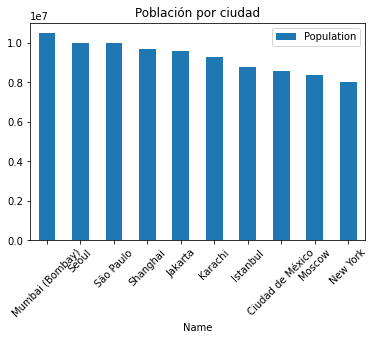

In [ ]:

# Plotting functions:
# df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
# df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie

df_city.iloc[:10].plot(kind='bar', x='Name', y='Population', title='Población por ciudad', rot=45)

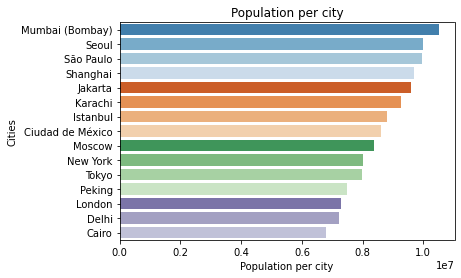

In [ ]:
ax = sns.barplot(x="Population", y="Name",
                 data=df_city.iloc[:15], palette="tab20c",
                 linewidth = 1)

plt.title("Population per city")
ax.set_xlabel(xlabel = 'Population per city', fontsize = 10)
ax.set_ylabel(ylabel = 'Cities', fontsize = 10)
plt.show()

## Mostrar los 10 países con mayor población:

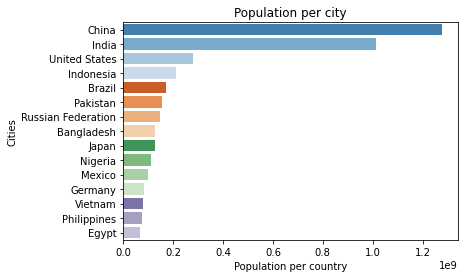

In [ ]:
df_country.sort_values('Population', ascending=False, inplace=True)

ax = sns.barplot(x="Population", y="Name",
                 data=df_country.iloc[:15], palette="tab20c",
                 linewidth = 1)

plt.title("Population per city")
ax.set_xlabel(xlabel = 'Population per country', fontsize = 10)
ax.set_ylabel(ylabel = 'Cities', fontsize = 10)
plt.show()


## Mostrar la población total por continente:

In [ ]:
serie = df_country.groupby('Continent')['Population'].sum()
df_pop = pd.DataFrame(serie)
df_pop.reset_index(inplace=True)
df_pop.sort_values('Population', ascending=False, inplace=True)
df_pop

,Continent,Population
2,Asia,3705025700
0,Africa,784475000
3,Europe,730074600
4,North America,482993000
6,South America,345780000
5,Oceania,30401150
1,Antarctica,0


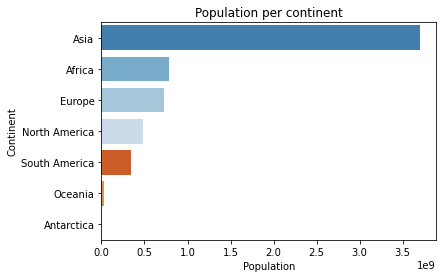

In [ ]:
ax = sns.barplot(x="Population", y="Continent",
                 data=df_pop, palette="tab20c",
                 linewidth = 1)

plt.title("Population per continent")
ax.set_xlabel(xlabel = 'Population', fontsize = 10)
ax.set_ylabel(ylabel = 'Continent', fontsize = 10)
plt.show()

## Mostrar los 15 países con mayor esperanza de vida

In [ ]:

df_country.sort_values('LifeExpectancy', ascending=False, inplace=True)


<AxesSubplot:title={'center':'Esperanza de vida por país'}, xlabel='Name'>

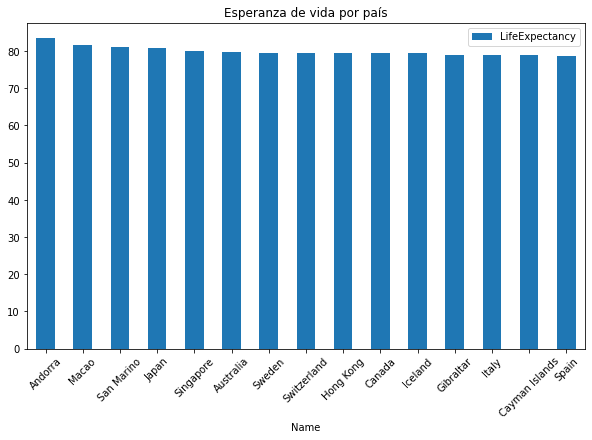

In [ ]:

df_country.iloc[:15].plot(figsize=(10, 6), kind='bar', x='Name', y='LifeExpectancy', title='Esperanza de vida por país', rot=45)

## Mostrar el área de los países

<AxesSubplot:xlabel='column1'>

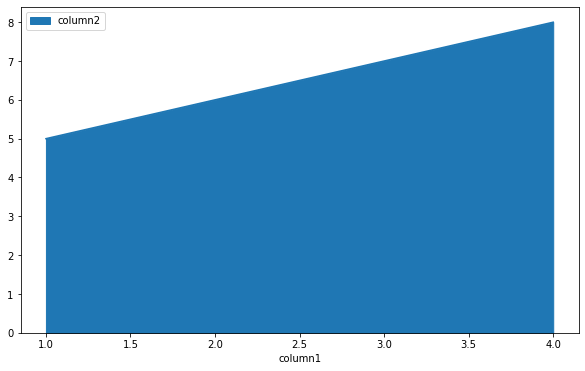

In [ ]:
prueba = pd.DataFrame({
    "column1": np.array([1,2,3,4]),
    "column2": np.array([5,6,7,8])
})
prueba.plot.area(figsize=(10, 6), x="column1", y="column2")

In [ ]:
df_country.sort_values('SurfaceArea', ascending=False, inplace=True)
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
181,RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,,NaN,AQ
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,598862.0,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US


In [ ]:
df_country.iloc[:5]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
181,RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,,NaN,AQ
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,598862.0,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US


<AxesSubplot:xlabel='Name'>

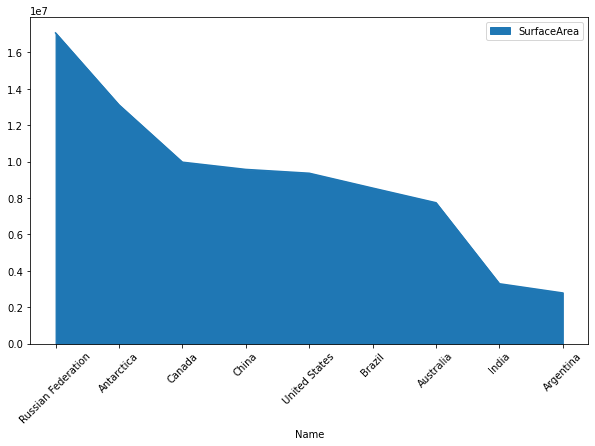

In [ ]:
df_country.iloc[:9].plot.area(figsize=(10, 6), x="Name", y="SurfaceArea", rot=45)

In [ ]:
serie = df_country.groupby('Continent')['SurfaceArea'].sum()
df_surface = pd.DataFrame(serie)
df_surface.reset_index(inplace=True)
df_surface.sort_values('SurfaceArea', ascending=False, inplace=True)
df_surface

,Continent,SurfaceArea
2,Asia,31881005.0
0,Africa,30250377.0
4,North America,24214470.0
3,Europe,23049133.9
6,South America,17864926.0
1,Antarctica,13132101.0
5,Oceania,8564294.0


<AxesSubplot:xlabel='Continent'>

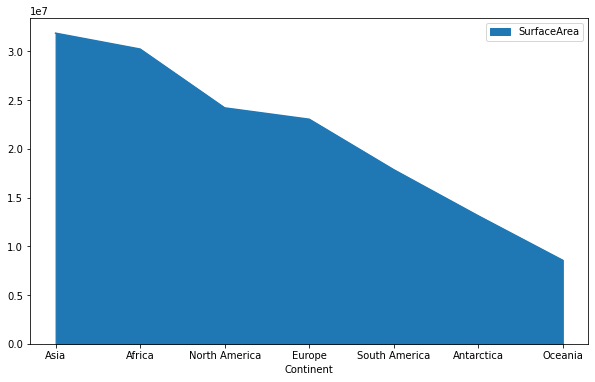

In [ ]:
df_surface.plot.area(figsize=(10, 6), x="Continent", y="SurfaceArea")


## Gráfico de tarta mostrando los porcentajes de idioma hablado en España

In [ ]:
df_country_language['Code'] = df_country_language.pop('CountryCode')
df_country_language.set_index('Code')

,Language,IsOfficial,Percentage
Code,,,
ABW,Dutch,T,5.3
ABW,English,F,9.5
ABW,Papiamento,F,76.7
ABW,Spanish,F,7.4
AFG,Balochi,F,0.9
...,...,...,...
ZMB,Tongan,F,11.0
ZWE,English,T,2.2
ZWE,Ndebele,F,16.2


In [ ]:
df_merged = pd.merge(df_country, df_country_language, on=["Code"])

In [ ]:
df_spain_language = df_merged[df_merged['Name'] == 'Spain']
df_spain_language = df_spain_language[['Language', 'Percentage']]
df_spain_language.set_index('Language', inplace=True)
df_spain_language.sort_values('Percentage', ascending=False, inplace=True)
df_spain_language


,Percentage
Language,
Spanish,74.4
Catalan,16.9
Galecian,6.4
Basque,1.6


<AxesSubplot:ylabel='Percentage'>

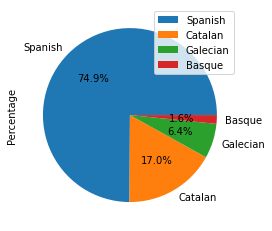

In [ ]:
df_spain_language.plot.pie(y="Percentage", autopct='%1.1f%%')



